In [1]:
import pandas as pd
import numpy as np

In [3]:
#Загружаем данные
data = pd.read_csv("data.csv", header = None)
data = data.head(-1)

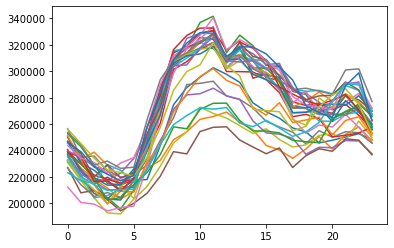

In [5]:
#Выведем все дневные графики
for i in range(31):
    data[i].plot()

In [6]:
#Выходные
data_weekend = data.iloc[:, data.columns  % 7 == 1]
#Предвыходные
data_preweekend = data.iloc[:, data.columns  % 7 == 0]
#Будние
data_weekdays = data.iloc[:, (data.columns % 7 > 1) & (data.columns % 7 <= 6)]

In [15]:
for weekend in data[:, data.columns  % 7 == 1]:
    weekend.plot()

TypeError: '(slice(None, None, None), array([False,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False]))' is an invalid key

In [9]:
#Синхронный фильтр
sync_filter_weekdays = data_weekdays.sum(axis = 1) / len(data_weekdays.columns)
sync_filter_weekend = data_weekend.sum(axis = 1) / len(data_weekend.columns)
sync_filter_preweekend = data_preweekend.sum(axis = 1) / len(data_preweekend.columns)

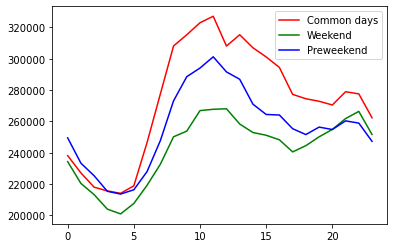

In [10]:
#Отображение графиков после синхронной фильтрации
sync_filter_weekdays.plot(color='r', label='Common days', legend = True)
sync_filter_weekend.plot(color='g', label='Weekend', legend = True)
sync_filter_preweekend.plot(color='b', label='Preweekend', legend = True)

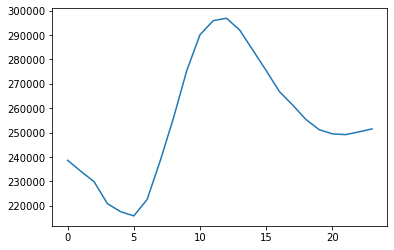

In [12]:
#Скользящее среднее с размером окна 2
k = 2
day = data[0]
day_len = len(day)

moving_average = pd.DataFrame(np.zeros(day_len))

for i in range(0, day_len):
    r = range(max(0, i-k), min(day_len - 1, i+k))
    
    for j in r:
        moving_average.iloc[i, 0] = moving_average.iloc[i, 0] + day[j]
        
    moving_average.iloc[i, 0] = 1 / len(r) * moving_average.iloc[i, 0]
moving_average.plot(legend = False)